In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
## Loading my datasets

event_description_mapping = pd.read_csv('Event Description Mapping.csv')
user_event_raw_dataset = pd.read_csv('User - Event Raw Dataset.csv')

In [5]:
user_event_raw_dataset['created_at_time'] = pd.to_datetime(user_event_raw_dataset['created_at_time'], format='%Y-%m-%d %H:%M')

In [6]:
## merging the datasets

merged_data = pd.merge(user_event_raw_dataset, event_description_mapping, left_on='event', right_on='Event', how='left')

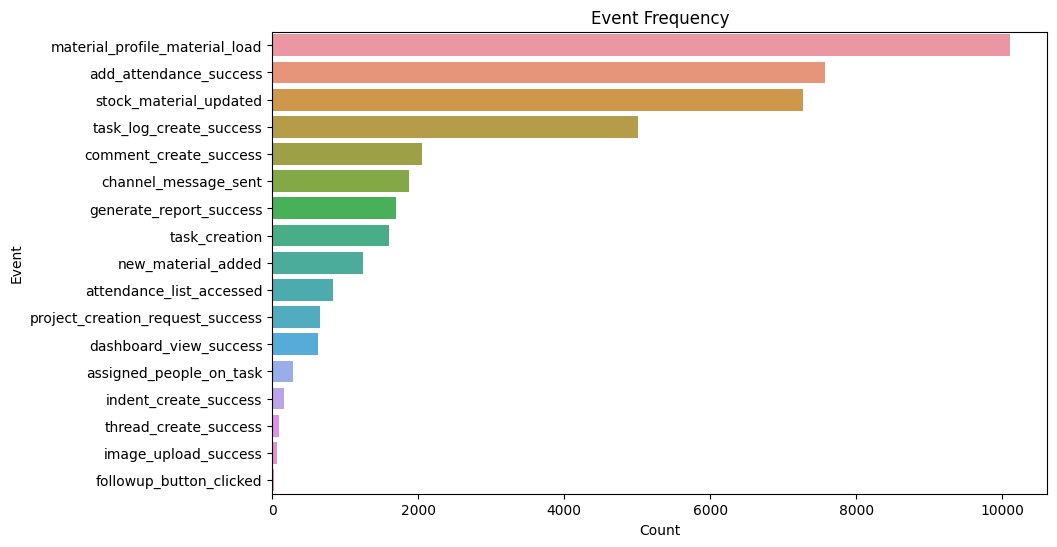

In [7]:
## 1. Event Frequency Analysis
event_frequency = merged_data['event'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y=event_frequency.index, x=event_frequency.values, orient='h')
plt.title('Event Frequency')
plt.xlabel('Count')
plt.ylabel('Event')
plt.show()

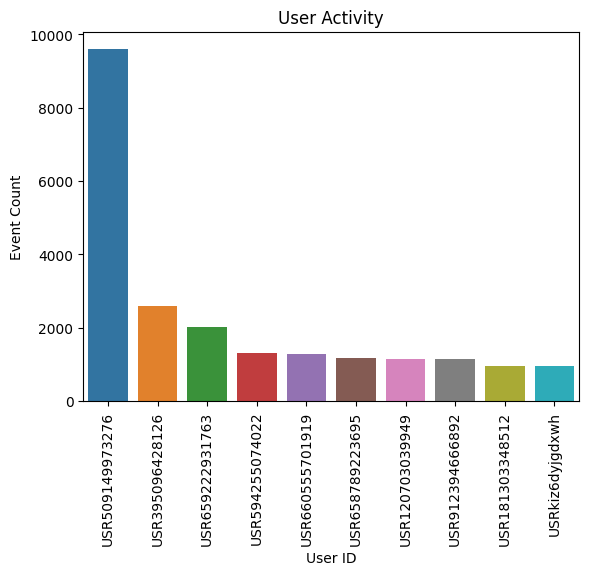

In [8]:
## 2. User Activity Analysis
user_activity = merged_data['user_id'].value_counts()
# top 10 active users
sns.barplot(x=user_activity[:10].index, y=user_activity[:10].values)
plt.title('User Activity')
plt.xlabel('User ID')
plt.ylabel('Event Count')
plt.xticks(rotation=90)
plt.show()

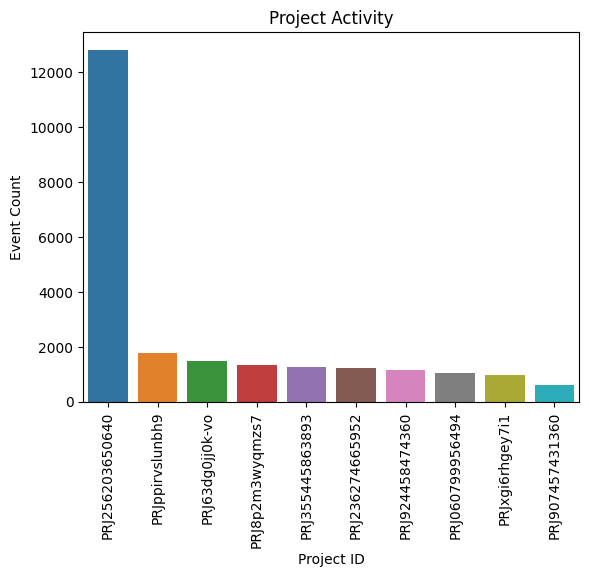

In [9]:
## 3. Project Activity Analysis
project_activity = merged_data['project_id'].value_counts()
# visualize top 10 active projects
sns.barplot(x=project_activity[:10].index, y=project_activity[:10].values)
plt.title('Project Activity')
plt.xlabel('Project ID')
plt.ylabel('Event Count')
plt.xticks(rotation=90)
plt.show()


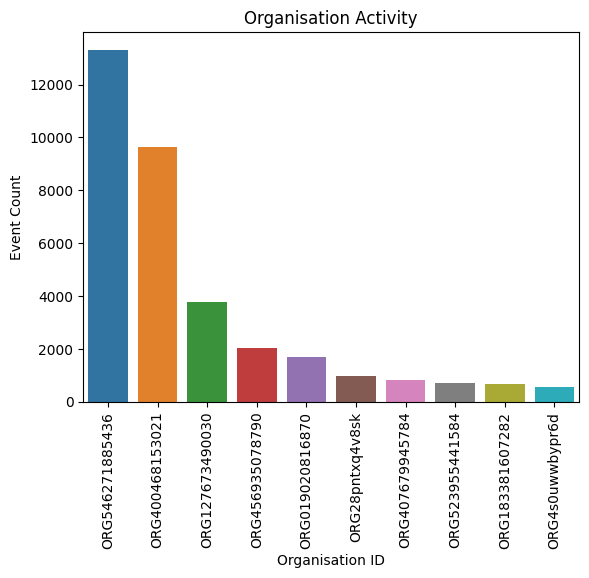

In [10]:
## 4. Organisation Activity Analysis
organisation_activity = merged_data['org_id'].value_counts()
# visualize top 10 active organisations
sns.barplot(x=organisation_activity[:10].index, y=organisation_activity[:10].values)
plt.title('Organisation Activity')
plt.xlabel('Organisation ID')
plt.ylabel('Event Count')
plt.xticks(rotation=90)
plt.show()

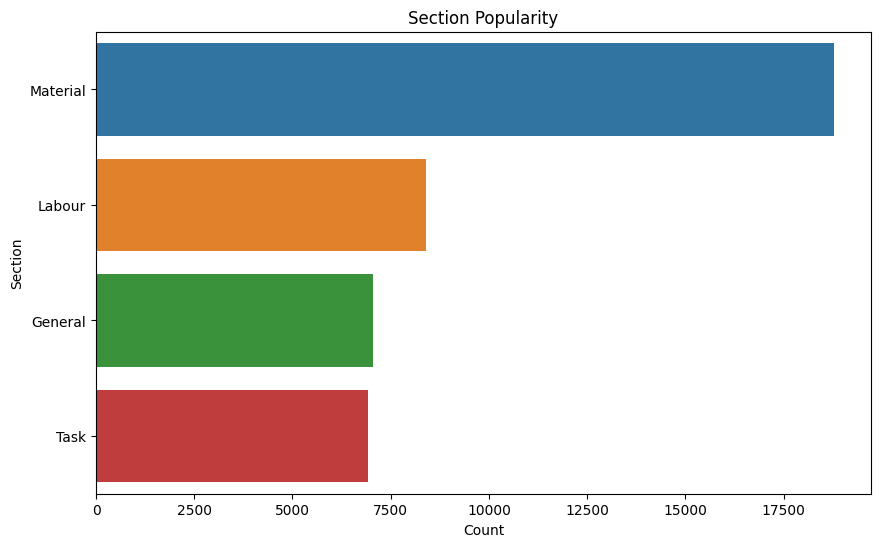

In [11]:
## 5. Section Popularity Analysis
section_popularity = merged_data['Section'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y=section_popularity.index, x=section_popularity.values, orient='h')
plt.title('Section Popularity')
plt.xlabel('Count')
plt.ylabel('Section')
plt.show()

## Insights

1. Popularity of Sections: The data indicates that the "Material" section is the most popular among users, with a count of more than 17,500 events. This suggests that a significant portion of user interactions and activities on the app is related to materials and inventory management.

2. Following Material, Other Sections: After the "Material" section, the popularity of sections decreases in the following order:

- Labour: The "Labour" section is the next most popular after the "Material" section, implying that users frequently engage in events related to attendance and tasks involving labor management.
- General: The "General" section comes next in terms of popularity, which includes various events like channel messages, comments, dashboard views, issue creations, and report generations. This indicates diverse interactions across the app's general features.
- Task: The "Task" section is relatively less popular compared to the above sections but still holds a notable number of events. Users frequently create tasks, assign individuals, log updates, and initiate follow-ups within this section.
3. Material Management Importance: The high popularity of the "Material" section highlights the significance of efficient material and inventory management within the app. This might suggest that users find this feature crucial for their organizational processes, likely in industries where material tracking and utilization are essential components.

4. Holistic App Engagement: While the "Material" section stands out in terms of popularity, the presence of events across different sections (Labour, General, and Task) indicates that users are engaging with various aspects of the app. This suggests a well-rounded user experience, encompassing labor management, communication, task tracking, and general operations.

In conclusion, the insights indicate that the "Material" section plays a pivotal role in app usage, but overall, the app caters to a wide range of functionalities, meeting the diverse needs of users in managing materials, labor, tasks, and general operations. Leveraging these insights can help further optimize the user experience and prioritize enhancements in different sections based on their importance and popularity.

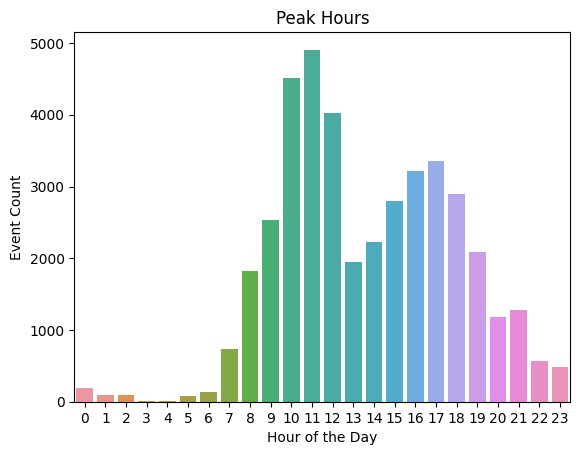

In [19]:
## 6. Hourly Activity
peak_hours = merged_data['hour'].value_counts()
sns.barplot(x=peak_hours.index, y=peak_hours.values)
plt.title('Peak Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.show()

## Insights


Based on the insights derived from the bar plot representing event counts throughout the day, we can observe the following patterns:

1. Peak Hour: The data clearly indicates that 11 am is the peak hour of the day when the highest number of events are recorded. This suggests that a significant portion of user activity and engagement occurs during this time.

2. Drop during Office Hours and Lunchtime: Following the peak hour at 11 am, there is a noticeable drop in event counts from 11 am to 12 pm, which could be attributed to office meeting hours for many individuals. Additionally, there is a steep drop from 12 pm to 1 pm, which aligns with the typical lunch hour. During this time, people may be occupied with work-related activities or taking a break for lunch.

3. Increasing Trend in the Afternoon: From 1 pm onwards, there is a consistent increase in event counts, with the peak occurring at the 17th hour, which is 5 pm. This upward trend might indicate that users become more active on the app as the workday progresses and they have more free time after work or other daily commitments.

4. Decreasing Trend in the Evening: After the peak at 5 pm, there is a gradual decrease in event counts. This decline could be attributed to people spending time with their families, engaging in leisure activities, or focusing on other personal commitments during the evening hours.


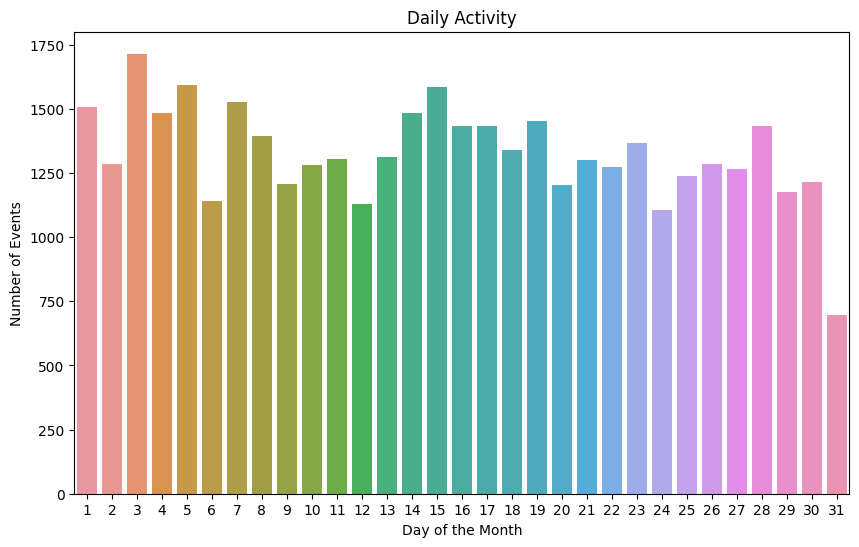

In [26]:
## 7. Daily Activity
daily_activity = merged_data.groupby('day')['event'].count()
plt.figure(figsize=(10,6))
sns.barplot(x=daily_activity.index, y=daily_activity.values)
plt.title('Daily Activity')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Events')
plt.show()

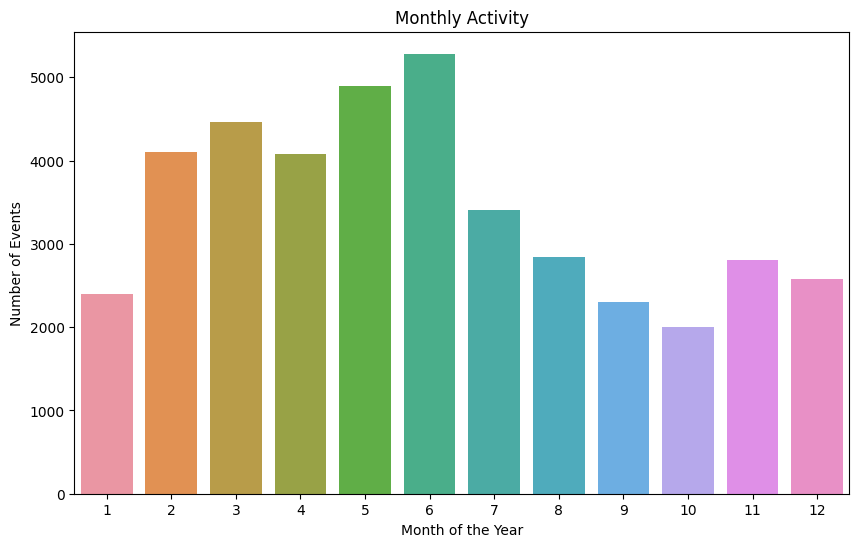

In [21]:
## 8. Monthly Activity
monthly_activity = merged_data.groupby('month')['event'].count()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_activity.index, y=monthly_activity.values)
plt.title('Monthly Activity')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Events')
plt.show()

## Insights

The data analysis reveals the following key points:

1. Seasonal Variation: The bar plot illustrates that the period from February to June experiences the highest level of activity with the most significant number of events occurring during this time. This suggests that the first half of the year is generally more eventful.

2. Fluctuating Trends: The graph also indicates that the number of events shows an increasing trend during the first half of the year, followed by a decreasing trend in the latter half. This pattern could be attributed to various factors affecting user engagement.

3. Influence of Festivals: One plausible reason for the drop in events during the later months of the year could be the festival season in India. Major festivals usually occur during this period, and people may have less time to spend on the app, leading to a decrease in event participation.

4. Deepavali Impact: The data shows that the 10th month, which coincides with the time around the Deepavali festival, records the lowest number of events. This observation further supports the notion that festivals may influence user activity on the app.

Overall, these insights provide valuable information about the seasonal variations and the influence of festivals on event activity. To enhance user engagement throughout the year, it might be worth considering strategies to encourage participation during festival seasons and maintain user interest during the latter half of the year. Further analysis and exploration of user behavior could help in formulating effective solutions to address these trends.

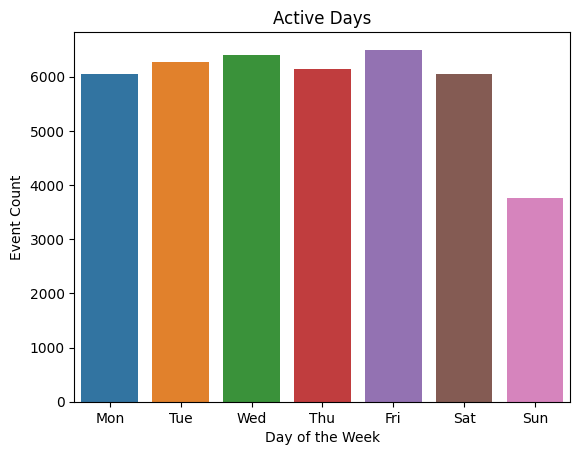

In [14]:
## 9. Active Days Analysis
merged_data['weekday'] = merged_data['created_at_time'].dt.dayofweek
active_days = merged_data['weekday'].value_counts()
sns.barplot(x=active_days.index, y=active_days.values)
plt.title('Active Days')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## Insights

1. Consistent Event Count: From Monday to Saturday, the event counts remain relatively stable, indicating that users consistently engage with the app and participate in various events across these days of the week.

2. Sunday Discrepancy: However, on Sundays, we see a significant decrease in event counts compared to the other days. This deviation is likely due to certain factors unique to Sundays.

3. Family and Rest Day: One plausible explanation for the drop in event counts on Sundays is that it is a day when people typically spend time with their families and friends. Sundays are often regarded as a day of rest and leisure, providing an opportunity for individuals to unwind and enjoy quality time with loved ones.

4. Reduced App Activity: As people prioritize relaxation and social activities on Sundays, their engagement with mobile apps and other digital platforms may decrease during this time. This behavioral shift can explain the sudden decline in event participation on this specific day.

5. Importance of Timing: The observed pattern underscores the importance of considering the timing of events and app-related activities when analyzing user engagement data. Understanding user behavior on different days of the week can help in tailoring app features and notifications to suit users' preferences and maximize engagement.

In conclusion, the insights highlight the consistent event engagement throughout the week, with a distinct drop on Sundays. Acknowledging the significance of Sundays as a day for personal time and relaxation can guide strategies to optimize app engagement and content distribution, ensuring a positive user experience across all days of the week.

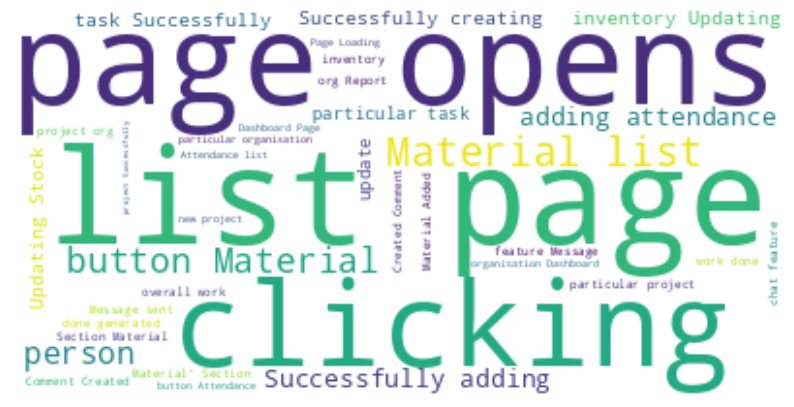

In [15]:
## 10. Event Description Word Analysis
wordcloud = WordCloud(background_color='white').generate(' '.join(merged_data['Description']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()